In [3]:
# # Load the CSV file with student data
# data_path = 'Data MHS.csv'
# data_mhs = pd.read_csv(data_path)

# data_mhs.head()

In [4]:
import pandas as pd

In [5]:
data_mhs_excel = pd.read_excel('Data SPK 2.xlsx')

data_mhs_excel.head()

,NPM,Mahasiswa,IPK,Project Score,Kehadiran,Keaktifan
0,65122002,Muhammad Fadil,3.225729,88,100,40.552756
1,65122003,Ayuni Aulia Prihatini,3.083723,91,100,71.197301
2,65122004,Nasywa Aura Permata Hati,3.409261,90,100,56.168978
3,65122005,Helena Octaviana,3.528271,89,100,76.147720
4,65122007,Muhammad Rafli Argoebi,3.226062,75,95,32.846734


In [6]:
data_mhs_excel["IPK"] = pd.to_numeric(data_mhs_excel["IPK"], errors='coerce')
data_mhs_excel["Project Score"] = pd.to_numeric(data_mhs_excel["Project Score"], errors='coerce')
data_mhs_excel["Kehadiran"] = pd.to_numeric(data_mhs_excel["Kehadiran"], errors='coerce')
data_mhs_excel["Keaktifan"] = pd.to_numeric(data_mhs_excel["Keaktifan"], errors='coerce')

data_mhs_excel.head()

,NPM,Mahasiswa,IPK,Project Score,Kehadiran,Keaktifan
0,65122002,Muhammad Fadil,3.225729,88,100,40.552756
1,65122003,Ayuni Aulia Prihatini,3.083723,91,100,71.197301
2,65122004,Nasywa Aura Permata Hati,3.409261,90,100,56.168978
3,65122005,Helena Octaviana,3.528271,89,100,76.147720
4,65122007,Muhammad Rafli Argoebi,3.226062,75,95,32.846734


In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
X = data_mhs_excel[["IPK", "Project Score", "Kehadiran", "Keaktifan"]]

In [9]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

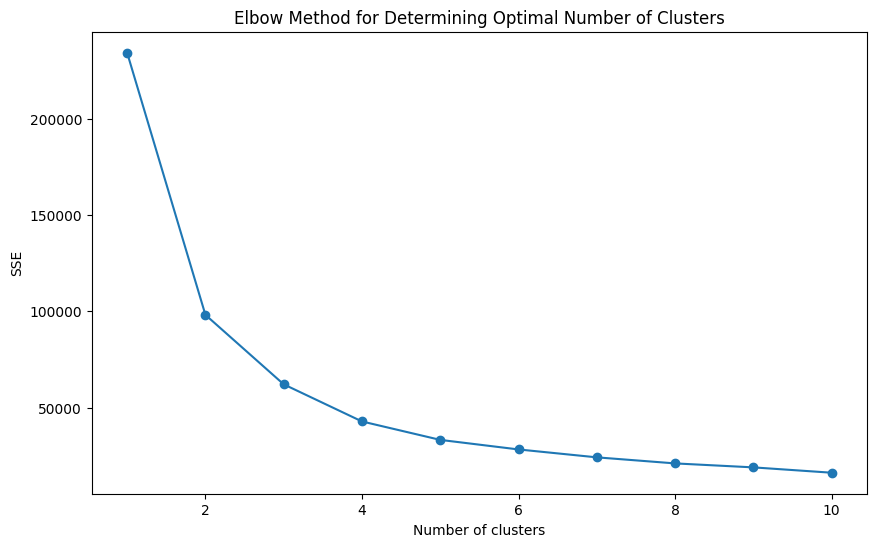

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.show()

In [11]:
n_clusters = 3

# Buat model KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
data_mhs_excel['Cluster'] = kmeans.fit_predict(X)

# Tampilkan hasil klastering
data_mhs_excel.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,NPM,Mahasiswa,IPK,Project Score,Kehadiran,Keaktifan,Cluster
0,65122002,Muhammad Fadil,3.225729,88,100,40.552756,0
1,65122003,Ayuni Aulia Prihatini,3.083723,91,100,71.197301,1
2,65122004,Nasywa Aura Permata Hati,3.409261,90,100,56.168978,1
3,65122005,Helena Octaviana,3.528271,89,100,76.147720,1
4,65122007,Muhammad Rafli Argoebi,3.226062,75,95,32.846734,0


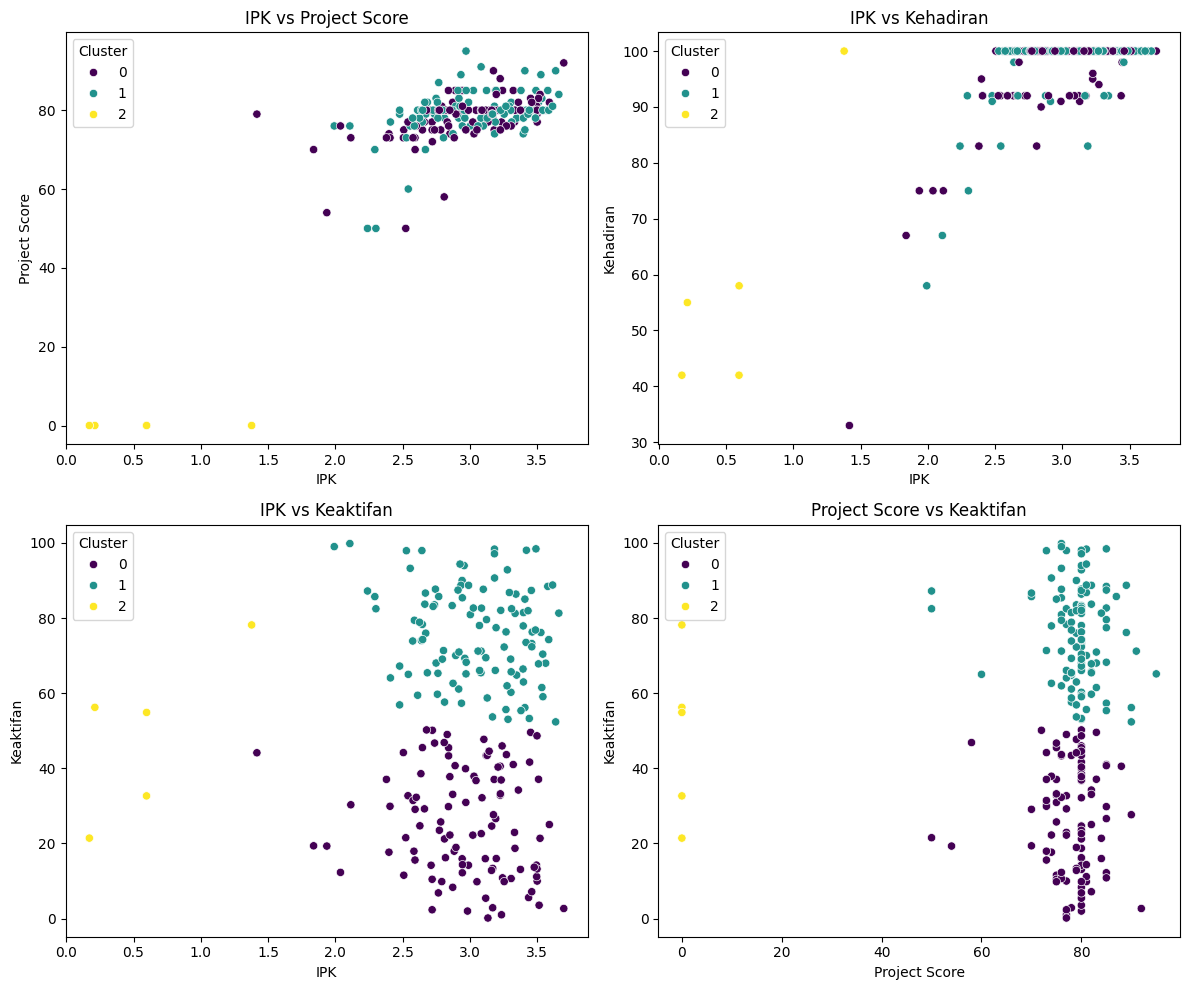

In [12]:
# Visualisasi klastering menggunakan scatter plot untuk setiap kombinasi fitur
plt.figure(figsize=(12, 10))

# Plot untuk IPK vs Project Score
plt.subplot(2, 2, 1)
sns.scatterplot(data=data_mhs_excel, x="IPK", y="Project Score", hue="Cluster", palette="viridis")
plt.title("IPK vs Project Score")

# Plot untuk IPK vs Kehadiran
plt.subplot(2, 2, 2)
sns.scatterplot(data=data_mhs_excel, x="IPK", y="Kehadiran", hue="Cluster", palette="viridis")
plt.title("IPK vs Kehadiran")

# Plot untuk IPK vs Keaktifan
plt.subplot(2, 2, 3)
sns.scatterplot(data=data_mhs_excel, x="IPK", y="Keaktifan", hue="Cluster", palette="viridis")
plt.title("IPK vs Keaktifan")

# Plot untuk Project Score vs Keaktifan
plt.subplot(2, 2, 4)
sns.scatterplot(data=data_mhs_excel, x="Project Score", y="Keaktifan", hue="Cluster", palette="viridis")
plt.title("Project Score vs Keaktifan")

plt.tight_layout()
plt.show()


In [13]:
# Statistik deskriptif untuk setiap klaster
cluster_description = data_mhs_excel.groupby('Cluster').agg({
    'IPK': ['mean', 'std', 'min', 'max', 'median'],
    'Project Score': ['mean', 'std', 'min', 'max', 'median'],
    'Kehadiran': ['mean', 'std', 'min', 'max', 'median'],
    'Keaktifan': ['mean', 'std', 'min', 'max', 'median']
})

cluster_description


IPK                                         Project Score  \
             mean       std       min       max    median          mean   
Cluster                                                                   
0        2.969308  0.400642  1.416953  3.698480  3.006016     78.057692   
1        3.048136  0.374404  1.991982  3.661771  3.083199     79.354545   
2        0.591020  0.484411  0.171548  1.377879  0.596392      0.000000   

                                  Kehadiran                             \
              std min max median       mean        std min  max median   
Cluster                                                                  
0        5.731580  50  92   80.0  96.336538   8.794979  33  100  100.0   
1        5.967168  50  95   80.0  97.772727   6.457567  58  100  100.0   
2        0.000000   0   0    0.0  59.400000  23.849528  42  100   55.0   

         Keaktifan                                              
              mean        std        min        max     median  
Cluster                                                         
0        25.471553  14.304198   0.167708  50.224030  24.075780  
1        75.695794  12.472040  52.366272  99.825270  76.059314  
2        48.674797  22.157623  21.431685  78.167602  54.878014

<ipython-input-14-76e821d8caa7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_mhs_excel, x='Cluster', y='IPK', palette="viridis")
<ipython-input-14-76e821d8caa7>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_mhs_excel, x='Cluster', y='Project Score', palette="viridis")
<ipython-input-14-76e821d8caa7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_mhs_excel, x='Cluster', y='Kehadiran', palette="viridis")
<ipython-input-14-76e821d8caa7>:21: FutureWarning: 

Passing `palette` without assigning `hue` is de

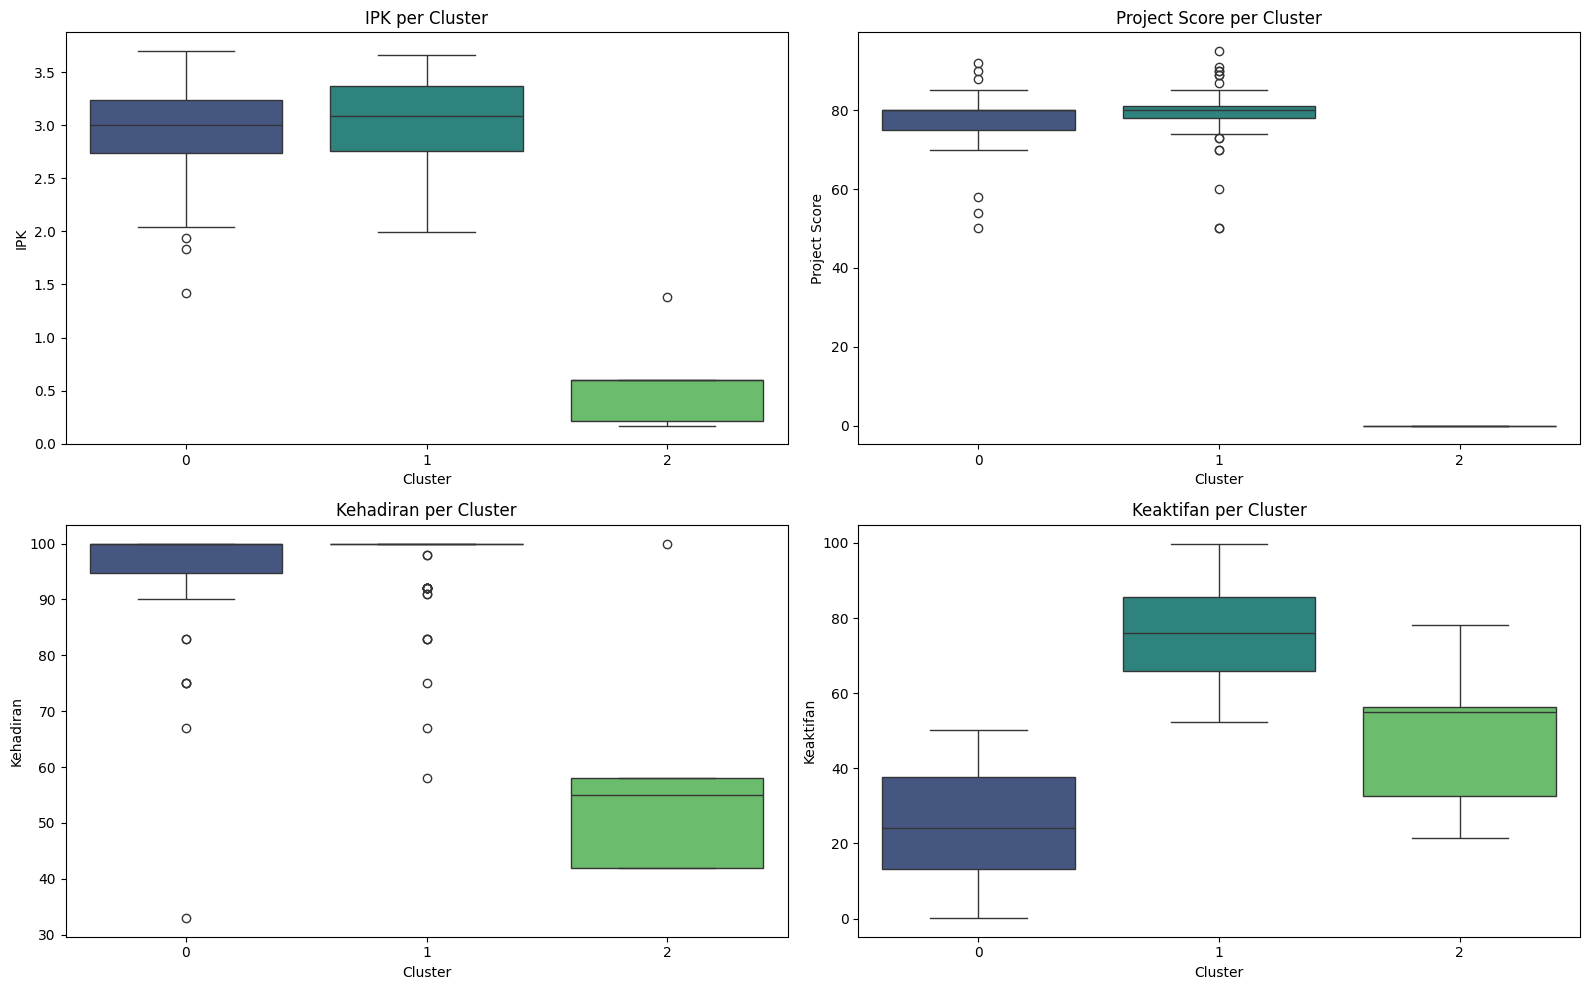

In [14]:
# Boxplot untuk setiap fitur dalam setiap klaster
plt.figure(figsize=(16, 10))

# Boxplot untuk IPK
plt.subplot(2, 2, 1)
sns.boxplot(data=data_mhs_excel, x='Cluster', y='IPK', palette="viridis")
plt.title("IPK per Cluster")

# Boxplot untuk Project Score
plt.subplot(2, 2, 2)
sns.boxplot(data=data_mhs_excel, x='Cluster', y='Project Score', palette="viridis")
plt.title("Project Score per Cluster")

# Boxplot untuk Kehadiran
plt.subplot(2, 2, 3)
sns.boxplot(data=data_mhs_excel, x='Cluster', y='Kehadiran', palette="viridis")
plt.title("Kehadiran per Cluster")

# Boxplot untuk Keaktifan
plt.subplot(2, 2, 4)
sns.boxplot(data=data_mhs_excel, x='Cluster', y='Keaktifan', palette="viridis")
plt.title("Keaktifan per Cluster")

plt.tight_layout()
plt.show()



In [15]:
# Menambahkan label ke setiap klaster
label_map = {0: 'Performa Tinggi', 1: 'Performa Rendah', 2: 'Performa Sedang'}
data_mhs_excel['Cluster Label'] = data_mhs_excel['Cluster'].map(label_map)

# Menampilkan hasil dengan label
data_mhs_excel.head()


,NPM,Mahasiswa,IPK,Project Score,Kehadiran,Keaktifan,Cluster,Cluster Label
0,65122002,Muhammad Fadil,3.225729,88,100,40.552756,0,Performa Tinggi
1,65122003,Ayuni Aulia Prihatini,3.083723,91,100,71.197301,1,Performa Rendah
2,65122004,Nasywa Aura Permata Hati,3.409261,90,100,56.168978,1,Performa Rendah
3,65122005,Helena Octaviana,3.528271,89,100,76.147720,1,Performa Rendah
4,65122007,Muhammad Rafli Argoebi,3.226062,75,95,32.846734,0,Performa Tinggi


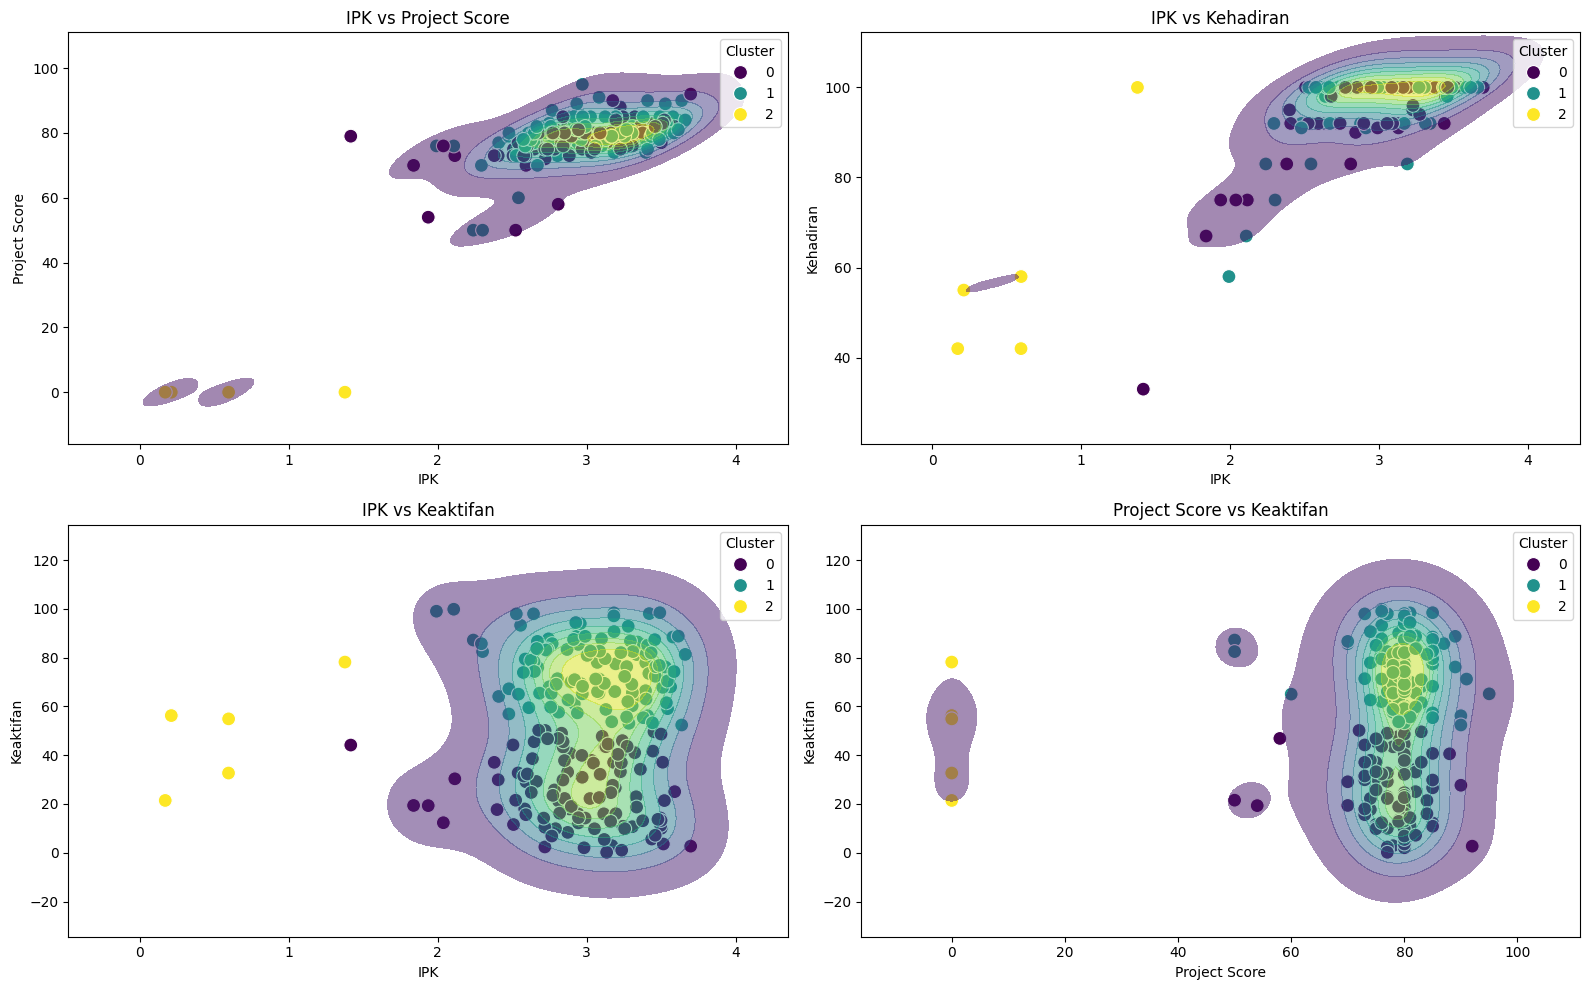

In [16]:
plt.figure(figsize=(16, 10))

# Plot untuk IPK vs Project Score dengan heat map
plt.subplot(2, 2, 1)
sns.scatterplot(data=data_mhs_excel, x="IPK", y="Project Score", hue="Cluster", palette="viridis", edgecolor="w", s=100)
sns.kdeplot(data=data_mhs_excel, x="IPK", y="Project Score", fill=True, cmap="viridis", alpha=0.5)
plt.title("IPK vs Project Score")

# Plot untuk IPK vs Kehadiran dengan heat map
plt.subplot(2, 2, 2)
sns.scatterplot(data=data_mhs_excel, x="IPK", y="Kehadiran", hue="Cluster", palette="viridis", edgecolor="w", s=100)
sns.kdeplot(data=data_mhs_excel, x="IPK", y="Kehadiran", fill=True, cmap="viridis", alpha=0.5)
plt.title("IPK vs Kehadiran")

# Plot untuk IPK vs Keaktifan dengan heat map
plt.subplot(2, 2, 3)
sns.scatterplot(data=data_mhs_excel, x="IPK", y="Keaktifan", hue="Cluster", palette="viridis", edgecolor="w", s=100)
sns.kdeplot(data=data_mhs_excel, x="IPK", y="Keaktifan", fill=True, cmap="viridis", alpha=0.5)
plt.title("IPK vs Keaktifan")

# Plot untuk Project Score vs Keaktifan dengan heat map
plt.subplot(2, 2, 4)
sns.scatterplot(data=data_mhs_excel, x="Project Score", y="Keaktifan", hue="Cluster", palette="viridis", edgecolor="w", s=100)
sns.kdeplot(data=data_mhs_excel, x="Project Score", y="Keaktifan", fill=True, cmap="viridis", alpha=0.5)
plt.title("Project Score vs Keaktifan")

plt.tight_layout()
plt.show()
